# Case Study 4: Data Mining in Email Data

**Required Readings:** 
* [Enron Emails](https://www.kaggle.com/wcukierski/enron-email-dataset) 
* Please download the Enron Email dataset from [here](https://www.cs.cmu.edu/~./enron/).

** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Email Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

The problem that I am going to be solving in this notebook is finding out if I can use email information to predict who is the sender of the email. The reason that this has importance is because it is useful in a scenario where a emailer has been flagged for some reason and they want to use a different email to continue to perform their malicious activities. This model would be able to predict if that individual is still potentially active under a different email.

# Data Collection/Processing: 

In [1]:
import pandas as pd
df = pd.read_csv ("emails.csv", nrows = 5000)
#load in 5000 rows due to the size of the dataset
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [35]:
#show the full instances in the message column
with pd.option_context('display.max_colwidth', None):
    print(df['message'])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [3]:
##organized version of the message column
for i, message in enumerate(df['message'][:5]):
    print(f"Message {i+1}:\n{message}\n{'-'*50}")

Message 1:
Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 
--------------------------------------------------
Message 2:
Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-O

In [36]:
import pandas as pd

# dataFrame with separate columns for each header field
parsed_df = pd.DataFrame(columns=['Message-ID', 'Date', 'From', 'To', 'Subject', 
                                  'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding',
                                  'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName', 'Message'])
# parse message and extract header fields
def parse_message(message):
    headers = {}
    lines = message.split('\n')
    message_body = ""
    for line in lines:
        if line.strip() == '':
            break  # Stop parsing when reaching the message body
        if ': ' in line:
            key, value = line.split(': ', 1)
            headers[key] = value
    message_body = '\n'.join(lines[len(headers)+1:])
    headers['Message'] = message_body
    return headers

# Iterate through all rows of the DataFrame
for i, row in df.iterrows():
    headers = parse_message(row['message'])
    parsed_df = parsed_df.append(headers, ignore_index=True)

C:\Users\adam\AppData\Local\Temp\ipykernel_8012\2830433337.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parsed_df = parsed_df.append(headers, ignore_index=True)
C:\Users\adam\AppData\Local\Temp\ipykernel_8012\2830433337.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parsed_df = parsed_df.append(headers, ignore_index=True)
C:\Users\adam\AppData\Local\Temp\ipykernel_8012\2830433337.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parsed_df = parsed_df.append(headers, ignore_index=True)
C:\Users\adam\AppData\Local\Temp\ipykernel_8012\2830433337.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parsed_df = parsed_df.app

In [37]:
# add the 'file' column
parsed_df['file'] = df['file']

parsed_df.head()

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Message,Cc,Bcc,file
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,NaN,NaN,allen-p/_sent_mail/1.
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,NaN,NaN,allen-p/_sent_mail/10.
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,NaN,NaN,allen-p/_sent_mail/100.
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",NaN,NaN,allen-p/_sent_mail/1000.
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,NaN,NaN,allen-p/_sent_mail/1001.


In [6]:
for i in parsed_df['Date']:
    print (i)
#investigate the date column

Mon, 14 May 2001 16:39:00 -0700 (PDT)
Fri, 4 May 2001 13:51:00 -0700 (PDT)
Wed, 18 Oct 2000 03:00:00 -0700 (PDT)
Mon, 23 Oct 2000 06:13:00 -0700 (PDT)
Thu, 31 Aug 2000 05:07:00 -0700 (PDT)
Thu, 31 Aug 2000 04:17:00 -0700 (PDT)
Tue, 22 Aug 2000 07:44:00 -0700 (PDT)
Fri, 14 Jul 2000 06:59:00 -0700 (PDT)
Tue, 17 Oct 2000 02:26:00 -0700 (PDT)
Mon, 16 Oct 2000 06:44:00 -0700 (PDT)
Mon, 16 Oct 2000 06:42:00 -0700 (PDT)
Fri, 13 Oct 2000 06:45:00 -0700 (PDT)
Mon, 9 Oct 2000 07:16:00 -0700 (PDT)
Mon, 9 Oct 2000 07:00:00 -0700 (PDT)
Thu, 5 Oct 2000 06:26:00 -0700 (PDT)
Thu, 5 Oct 2000 05:55:00 -0700 (PDT)
Wed, 4 Oct 2000 09:23:00 -0700 (PDT)
Fri, 4 May 2001 11:26:00 -0700 (PDT)
Tue, 3 Oct 2000 09:30:00 -0700 (PDT)
Tue, 3 Oct 2000 09:15:00 -0700 (PDT)
Tue, 3 Oct 2000 09:13:00 -0700 (PDT)
Tue, 3 Oct 2000 03:17:00 -0700 (PDT)
Mon, 2 Oct 2000 02:19:00 -0700 (PDT)
Thu, 28 Sep 2000 06:17:00 -0700 (PDT)
Thu, 28 Sep 2000 05:56:00 -0700 (PDT)
Tue, 26 Sep 2000 09:28:00 -0700 (PDT)
Tue, 26 Sep 2000 09:26:0

In [7]:
p_df = parsed_df.copy()
date_time_split = p_df['Date'].str.split(' ', n=4, expand=True)

# assign split parts to the 'Date' and 'Time' columns
p_df['Date'] = date_time_split[[0, 1, 2, 3]].agg(' '.join, axis=1)
p_df['Time'] = date_time_split[4]

p_df.head()

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Message,Cc,Bcc,file,Time
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,NaN,NaN,allen-p/_sent_mail/1.,16:39:00 -0700 (PDT)
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,NaN,NaN,allen-p/_sent_mail/10.,13:51:00 -0700 (PDT)
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,NaN,NaN,allen-p/_sent_mail/100.,03:00:00 -0700 (PDT)
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",NaN,NaN,allen-p/_sent_mail/1000.,06:13:00 -0700 (PDT)
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,NaN,NaN,allen-p/_sent_mail/1001.,05:07:00 -0700 (PDT)


In [8]:
# nulls
null_counts = parsed_df.isnull().sum()
print(null_counts)


Message-ID                      0
Date                            0
From                            0
To                             78
Subject                         0
Mime-Version                    0
Content-Type                    0
Content-Transfer-Encoding       0
X-From                          0
X-To                            0
X-cc                            0
X-bcc                           0
X-Folder                        0
X-Origin                        0
X-FileName                      0
Message                         0
Cc                           4664
Bcc                          4664
file                            0
dtype: int64


In [9]:
# remove rows with null values in the 'To' column
p_df.dropna(subset=['To'], inplace=True)
p_df.drop(['Cc', 'Bcc'], axis=1, inplace=True)
print(p_df.shape)

(4922, 18)


In [10]:
null_counts = p_df.isnull().sum()

print(null_counts)

Message-ID                   0
Date                         0
From                         0
To                           0
Subject                      0
Mime-Version                 0
Content-Type                 0
Content-Transfer-Encoding    0
X-From                       0
X-To                         0
X-cc                         0
X-bcc                        0
X-Folder                     0
X-Origin                     0
X-FileName                   0
Message                      0
file                         0
Time                         0
dtype: int64


# Data Exploration: Exploring the Email Dataset

**plot email communication graph/network** 
* each node is an email account
* the weight of an edge between two accounts depends on how many emails have been sent between them.

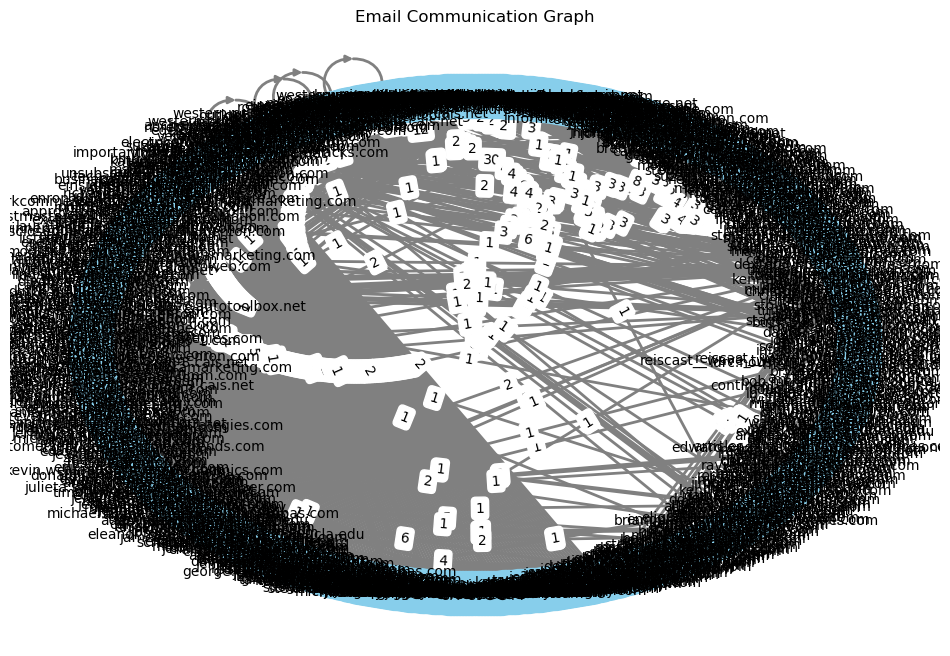

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# create a directed graph
G = nx.DiGraph()

for idx, row in parsed_df.iterrows():
    sender = row['From']
    receivers = row['To'].split(',') if isinstance(row['To'], str) else []
    
    # add nodes for sender and receivers
    G.add_node(sender)
    for receiver in receivers:
        G.add_node(receiver.strip())
        
        # edge weight or add edge if not present
        if G.has_edge(sender, receiver.strip()):
            G[sender][receiver.strip()]['weight'] += 1
        else:
            G.add_edge(sender, receiver.strip(), weight=1)

plt.figure(figsize=(12, 8))
ax = plt.gca()
pos = nx.circular_layout(G) 
nx.draw(G, pos, ax=ax, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, edge_color='gray', width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Email Communication Graph')
plt.show()

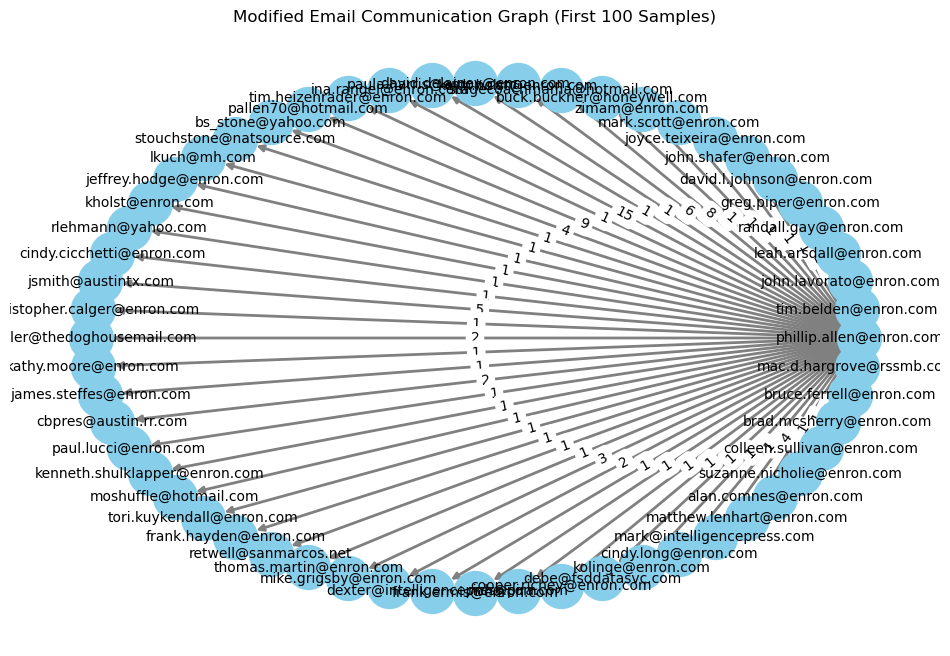

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
#shorter vesion of the previous graph

G_modified = nx.DiGraph()

# the first 100 rows of the parsed DataFrame
for idx, row in parsed_df.head(100).iterrows():
    sender_mod = row['From']
    receivers_mod = row['To'].split(',') if isinstance(row['To'], str) else []

    G_modified.add_node(sender_mod)
    for receiver_mod in receivers_mod:
        G_modified.add_node(receiver_mod.strip())

        if G_modified.has_edge(sender_mod, receiver_mod.strip()):
            G_modified[sender_mod][receiver_mod.strip()]['weight'] += 1
        else:
            G_modified.add_edge(sender_mod, receiver_mod.strip(), weight=1)

plt.figure(figsize=(12, 8))
ax = plt.gca()

pos_mod = nx.circular_layout(G_modified) 
nx.draw(G_modified, pos_mod, ax=ax, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, edge_color='gray', width=2)
labels_mod = nx.get_edge_attributes(G_modified, 'weight')
nx.draw_networkx_edge_labels(G_modified, pos_mod, edge_labels=labels_mod)
plt.title('Modified Email Communication Graph (First 100 Samples)')
plt.show()

This is an easier to see version that only includes 100 instances in this graph. The first 100 instnaces are all sent from phillip.allen@enron.com. Some people have been emailed as many as 15 times while others just once. 

In [13]:
p_df.head()

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Message,file,Time
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p/_sent_mail/1.,16:39:00 -0700 (PDT)
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p/_sent_mail/10.,13:51:00 -0700 (PDT)
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p/_sent_mail/100.,03:00:00 -0700 (PDT)
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p/_sent_mail/1000.,06:13:00 -0700 (PDT)
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p/_sent_mail/1001.,05:07:00 -0700 (PDT)


In [14]:
# top 10 'From' values with their counts
top_10_from_values = p_df['From'].value_counts().head(10)

# top 10 'To' values with their counts
top_10_to_values = p_df['To'].value_counts().head(10)

print("Top 10 'From' values:")
print(top_10_from_values)

print("\nTop 10 'To' values:")
print(top_10_to_values)


Top 10 'From' values:
phillip.allen@enron.com                    2122
john.arnold@enron.com                      1631
k..allen@enron.com                          296
sarah-joy.hunter@enron.com                   50
jeff.youngflesh@enron.com                    49
arsystem@mailman.enron.com                   39
webmaster@earnings.com                       27
ina.rangel@enron.com                         26
anchordesk_daily@anchordesk.zdlists.com      20
critical.notice@enron.com                    18
Name: From, dtype: int64

Top 10 'To' values:
ina.rangel@enron.com          246
pallen@enron.com              179
stagecoachmama@hotmail.com    153
jsmith@austintx.com           146
john.lavorato@enron.com       130
pallen70@hotmail.com          119
slafontaine@globalp.com       117
keith.holst@enron.com          92
k..allen@enron.com             84
jennifer.fraser@enron.com      81
Name: To, dtype: int64


In [15]:
# top 5 values in every column
top_values = {}
for column in p_df.columns:
    top_values[column] = p_df[column].value_counts().head()

for column, values in top_values.items():
    print(f"Top 5 values in column '{column}':")
    print(values)
    print()


Top 5 values in column 'Message-ID':
<18782981.1075855378110.JavaMail.evans@thyme>    1
<7974271.1075857602297.JavaMail.evans@thyme>     1
<1461291.1075857602432.JavaMail.evans@thyme>     1
<23610249.1075857595011.JavaMail.evans@thyme>    1
<30176515.1075857602411.JavaMail.evans@thyme>    1
Name: Message-ID, dtype: int64

Top 5 values in column 'Date':
Wed, 13 Dec 2000    109
Tue, 12 Dec 2000     65
Sun, 13 May 2001     48
Tue, 26 Sep 2000     45
Mon, 14 May 2001     43
Name: Date, dtype: int64

Top 5 values in column 'From':
phillip.allen@enron.com       2122
john.arnold@enron.com         1631
k..allen@enron.com             296
sarah-joy.hunter@enron.com      50
jeff.youngflesh@enron.com       49
Name: From, dtype: int64

Top 5 values in column 'To':
ina.rangel@enron.com          246
pallen@enron.com              179
stagecoachmama@hotmail.com    153
jsmith@austintx.com           146
john.lavorato@enron.com       130
Name: To, dtype: int64

Top 5 values in column 'Subject':
          

In [16]:
df2 = p_df.copy()

In [17]:
df2['Message'] = df2['Message'].str.replace('[^\w\s]', '')
##goes through message column to remove special characters

C:\Users\adam\AppData\Local\Temp\ipykernel_8012\2838636261.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Message'] = df2['Message'].str.replace('[^\w\s]', '')


In [18]:
df2 = df2.applymap(str.lower)

In [19]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# tokenize each word in the 'Message' column
df2['Message'] = df2['Message'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk

nltk.download('stopwords')

# remove stopwords from a list of words
def remove_stopwords(words):
    return [word for word in words if word.lower() not in ENGLISH_STOP_WORDS]

# apply remove_stopwords to the 'Message' column
df2['Message'] = df2['Message'].apply(lambda x: remove_stopwords(x) if isinstance(x, list) else x)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')

porter = PorterStemmer()

#  stem words in a list of words
def stem_words(words):
    return [porter.stem(word) for word in words]

# stem_words the 'Message' column
df2['Message'] = df2['Message'].apply(stem_words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
from gensim.models import Word2Vec

# create word vectors for word embedding
word2vec_model = Word2Vec(sentences=df2['Message'], vector_size=100, window=5, min_count=1, workers=4)

In [23]:
import numpy as np

# compute average vector for a list of word vectors
def compute_average_vector(tokens):
    if len(tokens) == 0:
        return np.zeros(100) 
    else:
        return np.mean([word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv], axis=0)

# compute average vectors for each message
df2['average_vector'] = df2['Message'].apply(lambda x: compute_average_vector(x))
df2.head()

,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,Message,file,Time,average_vector
0,<18782981.1075855378110.javamail.evans@thyme>,"mon, 14 may 2001",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,phillip k allen,tim belden <tim belden/enron@enronxgate>,,,"\phillip_allen_jan2002_1\allen, phillip k.\'se...",allen-p,pallen (non-privileged).pst,[forecast],allen-p/_sent_mail/1.,16:39:00 -0700 (pdt),"[-0.2266207, 0.12464252, 0.10672539, -1.041538..."
1,<15464986.1075855378456.javamail.evans@thyme>,"fri, 4 may 2001",phillip.allen@enron.com,john.lavorato@enron.com,re:,1.0,text/plain; charset=us-ascii,7bit,phillip k allen,john j lavorato <john j lavorato/enron@enronxg...,,,"\phillip_allen_jan2002_1\allen, phillip k.\'se...",allen-p,pallen (non-privileged).pst,"[travel, busi, meet, take, fun, trip, especi, ...",allen-p/_sent_mail/10.,13:51:00 -0700 (pdt),"[-0.68144417, 0.6548163, -0.07897989, -0.71245..."
2,<24216240.1075855687451.javamail.evans@thyme>,"wed, 18 oct 2000",phillip.allen@enron.com,leah.arsdall@enron.com,re: test,1.0,text/plain; charset=us-ascii,7bit,phillip k allen,leah van arsdall,,,\phillip_allen_dec2000\notes folders\'sent mail,allen-p,pallen.nsf,"[test, success, way]",allen-p/_sent_mail/100.,03:00:00 -0700 (pdt),"[-0.62701684, 0.6019958, -0.19210227, -0.92467..."
3,<13505866.1075863688222.javamail.evans@thyme>,"mon, 23 oct 2000",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,phillip k allen,randall l gay,,,\phillip_allen_dec2000\notes folders\'sent mail,allen-p,pallen.nsf,"[randi, send, schedul, salari, level, schedul,...",allen-p/_sent_mail/1000.,06:13:00 -0700 (pdt),"[-0.1375089, 0.5208132, 0.14234987, -0.7215434..."
4,<30922949.1075863688243.javamail.evans@thyme>,"thu, 31 aug 2000",phillip.allen@enron.com,greg.piper@enron.com,re: hello,1.0,text/plain; charset=us-ascii,7bit,phillip k allen,greg piper,,,\phillip_allen_dec2000\notes folders\'sent mail,allen-p,pallen.nsf,"[let, shoot, tuesday, 1145]",allen-p/_sent_mail/1001.,05:07:00 -0700 (pdt),"[-0.14041351, 0.6122739, -0.056530677, -0.0016..."


In [24]:
# select the required columns from df2
df_3 = df2[['average_vector', 'To', 'From', 'Date']].copy()

df_3.head()

,average_vector,To,From,Date
0,"[-0.2266207, 0.12464252, 0.10672539, -1.041538...",tim.belden@enron.com,phillip.allen@enron.com,"mon, 14 may 2001"
1,"[-0.68144417, 0.6548163, -0.07897989, -0.71245...",john.lavorato@enron.com,phillip.allen@enron.com,"fri, 4 may 2001"
2,"[-0.62701684, 0.6019958, -0.19210227, -0.92467...",leah.arsdall@enron.com,phillip.allen@enron.com,"wed, 18 oct 2000"
3,"[-0.1375089, 0.5208132, 0.14234987, -0.7215434...",randall.gay@enron.com,phillip.allen@enron.com,"mon, 23 oct 2000"
4,"[-0.14041351, 0.6122739, -0.056530677, -0.0016...",greg.piper@enron.com,phillip.allen@enron.com,"thu, 31 aug 2000"


In [25]:
# convert Date column to datetime
df_3['Date'] = pd.to_datetime(df_3['Date'], format='%a, %d %b %Y')

df_3['Date']

0      2001-05-14
1      2001-05-04
2      2000-10-18
3      2000-10-23
4      2000-08-31
          ...    
4993   2001-10-09
4994   2001-10-09
4996   2001-10-09
4997   2001-10-09
4998   2001-10-09
Name: Date, Length: 4922, dtype: datetime64[ns]

In [26]:
# number of unique values in the 'To' column
unique_to_count = df_3['To'].nunique()
print("Number of unique values in the 'To' column:", unique_to_count)

Number of unique values in the 'To' column: 679


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# transform the 'To' column to numerical values
df_3['To_encoded'] = label_encoder.fit_transform(df_3['To'])

df_3.head()

,average_vector,To,From,Date,To_encoded
0,"[-0.2266207, 0.12464252, 0.10672539, -1.041538...",tim.belden@enron.com,phillip.allen@enron.com,2001-05-14,638
1,"[-0.68144417, 0.6548163, -0.07897989, -0.71245...",john.lavorato@enron.com,phillip.allen@enron.com,2001-05-04,312
2,"[-0.62701684, 0.6019958, -0.19210227, -0.92467...",leah.arsdall@enron.com,phillip.allen@enron.com,2000-10-18,394
3,"[-0.1375089, 0.5208132, 0.14234987, -0.7215434...",randall.gay@enron.com,phillip.allen@enron.com,2000-10-23,526
4,"[-0.14041351, 0.6122739, -0.056530677, -0.0016...",greg.piper@enron.com,phillip.allen@enron.com,2000-08-31,211


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

I am going to use use the vectors acquired from word2vec to create a random forest model that can predict the 'from' values. The vectors were created from the message column. The goal is that the model will recognize the way each individual writes and will be able to see who sent a message based on how it was written. 

Write codes to implement the solution in python:

In [29]:
import pandas as pd

# keeo the original 'average_vector' and 'From' columns only
df_original = df_3[['average_vector', 'From']].copy()

df_original.head()

,average_vector,From
0,"[-0.2266207, 0.12464252, 0.10672539, -1.041538...",phillip.allen@enron.com
1,"[-0.68144417, 0.6548163, -0.07897989, -0.71245...",phillip.allen@enron.com
2,"[-0.62701684, 0.6019958, -0.19210227, -0.92467...",phillip.allen@enron.com
3,"[-0.1375089, 0.5208132, 0.14234987, -0.7215434...",phillip.allen@enron.com
4,"[-0.14041351, 0.6122739, -0.056530677, -0.0016...",phillip.allen@enron.com


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# split the data into features (X) and dependent variable (y)
X = df_original['average_vector'].tolist() 
y = df_original['From']
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
# predictions on the test set
y_pred = rf_classifier.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8761421319796955


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


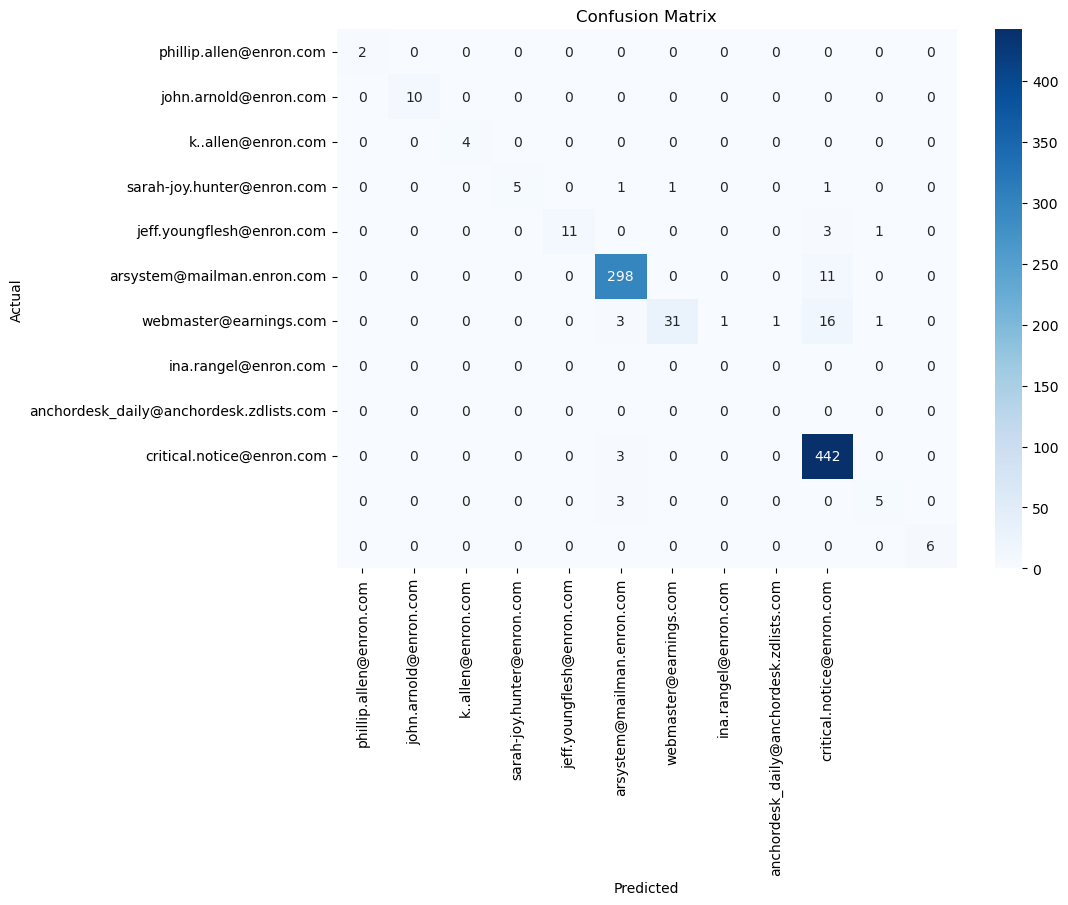

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# top 10 most frequent values from the 'From' column
top_10_from = df_original['From'].value_counts().head(10).index.tolist()

# filter predictions and actual values to include only the top 10 
filtered_y_test = y_test[y_test.isin(top_10_from)]
filtered_y_pred = y_pred[y_test.isin(top_10_from)]

# confusion matrix
conf_matrix = confusion_matrix(filtered_y_test, filtered_y_pred)

# confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=top_10_from, yticklabels=top_10_from)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. Please make sure all the plotted tables and figures are in the notebook. 